In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from utils.data import read_pickle, load_network
from utils.vis import reorder_cluster_ids, plot_raster, vis_heatmap
from seaborn import heatmap

network_df = load_network()
obs_1ms_df = network_df.apply(lambda x: x.sum(0))
n_trials_1ms_df = network_df.apply(lambda x: x.shape[0])

n_ms = 10
obs_all = obs_1ms_df.apply(lambda x: x.reshape((-1, n_ms)).sum(1)).values.tolist()
n_trials_all = n_trials_1ms_df.values * n_ms
cue_time = 500 // n_ms

In [15]:
out = read_pickle('../pickle/sim2.p')
cluster_ids, cluster_params, n_clusters = reorder_cluster_ids(*out)

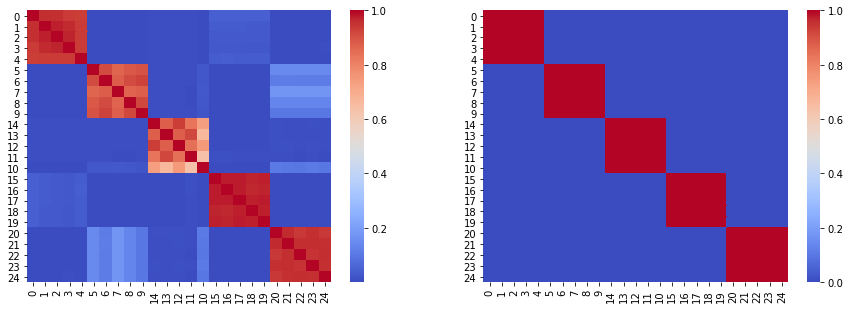

In [16]:
burnin = 1000
sim_mat, all_best_gibbs, all_sim_mats = vis_heatmap(cluster_ids[burnin:])

In [17]:
all_best_idx = burnin + all_best_gibbs

In [18]:
all_best_idx

array([1002, 1003, 1006, ..., 9997, 9998, 9999])

In [19]:
best_idx = all_best_idx[0]
best_ids = cluster_ids[best_idx]
for k in np.unique(best_ids):
    ids = np.arange(33)[best_ids == k]
    for n in ids:
        plot_raster(network_df.iloc[n], ms=5, offset=45-network_df.iloc[n].shape[0])
    plt.title('jump=%.2f, log_var=%.2f, num=%d' % (cluster_params[best_idx][k][0], 
                                                   cluster_params[best_idx][k][1], 
                                                   ids.shape[0]))
    plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 33 but corresponding boolean dimension is 25

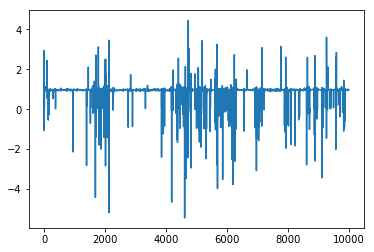

In [20]:
plt.plot([cluster_params[i][cluster_ids[i][0], 0] for i in range(len(cluster_ids))])